<a href="https://colab.research.google.com/github/chebbin/datasci_3_eda/blob/main/hha507hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro
import seaborn as sns




# Load in data

In [2]:
df_lab = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK3/data/trinetx/lab_result.csv')
df_lab.sample(20)


,patient_id,encounter_id,code_system,code,date,lab_result_num_val,lab_result_text_val,units_of_measure,derived_by_TriNetX,source_id
135174,Bgu,EAvJB,LOINC,59457-2,20150325,NaN,NaN,units,F,EHR
88231,BAK,EANu,LOINC,59458-0,20141006,NaN,NaN,units,F,EHR
170840,BA5,EwrSB,LOINC,9598-4,20220106,NaN,Negative,boolean,F,EHR
159233,BA2,EQ0NB,LOINC,76536-2,20200402,79.0,NaN,units,F,EHR
179702,BQ7,EA3TB,LOINC,76214-6,20131219,74.0,NaN,units,F,EHR
258804,BwpB,EgFzB,LOINC,89280-2,20170905,128.0,NaN,mm[Hg],F,EHR
301401,BgeC,EAqNC,LOINC,59459-8,20181028,NaN,NaN,units,F,EHR
14654,BwCD,EA#I,LOINC,5802-4,20220323,NaN,Negative,boolean,F,EHR
152740,Bwx,EwtLB,LOINC,788-0,20100128,13.5,NaN,%,F,EHR
134665,BQu,EQUJB,LOINC,76536-2,20191013,84.0,NaN,units,F,EHR


In [3]:
df_lab.shape


(338198, 10)

In [4]:
df_lab.columns


Index(['patient_id', 'encounter_id', 'code_system', 'code', 'date',
       'lab_result_num_val', 'lab_result_text_val', 'units_of_measure',
       'derived_by_TriNetX', 'source_id'],
      dtype='object')

# How many unique LOINC codes are in this dataset?

In [5]:
df_lab['code'].nunique()

1590

# Describe the values for each LOINC code

In [6]:
df_lab.groupby('code')['lab_result_num_val'].describe()


,count,mean,std,min,25%,50%,75%,max
code,,,,,,,,
1007-4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10230-1,181.0,57.690608,14.664521,10.0000,55.00000,60.0000,66.00000,83.0000
10334-1,18.0,60.966667,53.159460,13.0000,25.05000,38.6500,69.40000,188.8000
10362-2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10368-9,5.0,3.180000,0.164317,3.0000,3.00000,3.3000,3.30000,3.3000
...,...,...,...,...,...,...,...,...
LP64598-3,62.0,64.702705,3.736011,56.9999,62.05115,64.9802,66.95855,74.9998
LP65139-5,129.0,174.105202,49.050715,89.9993,136.68700,167.5510,198.41600,360.2350
LP65487-8,384.0,37.138802,4.335497,36.1000,36.60000,36.7000,37.00000,99.0000


# See if the mean matches the description

In [7]:
df_lab.groupby('code')['lab_result_num_val'].mean()

code
1007-4              NaN
10230-1       57.690608
10334-1       60.966667
10362-2             NaN
10368-9        3.180000
                ...    
LP64598-3     64.702705
LP65139-5    174.105202
LP65487-8     37.138802
LP72199-0     18.674419
LP72677-5     89.033632
Name: lab_result_num_val, Length: 1590, dtype: float64

# Find the median lab result for each code

In [36]:
df_lab.groupby('code')['lab_result_num_val'].median()

code
1007-4            NaN
10230-1       60.0000
10334-1       38.6500
10362-2           NaN
10368-9        3.3000
               ...   
LP64598-3     64.9802
LP65139-5    167.5510
LP65487-8     36.7000
LP72199-0     17.0000
LP72677-5     85.0000
Name: lab_result_num_val, Length: 1590, dtype: float64

# Find the mode for each code
Dont know why this did not work

In [37]:
df_lab.groupby('code')['lab_result_num_val'].mode()

AttributeError: ignored

# How many unique values are in the lab result text value column?

In [8]:
df_lab['lab_result_text_val'].nunique()

9

# What are the text lab values included in this data set?

In [9]:
print(df_lab['lab_result_text_val'].unique())

[nan 'Negative' 'Unknown' 'yellow' 'Positive' 'amber' 'red' 'clear'
 'brown' 'dark yellow']


# Analyze the distribution of the systolic blood pressures in this data set

In [10]:
systolic_bp = df_lab[df_lab['code'] == '89280-2']
systolic_bp['lab_result_num_val'].describe()


count    9876.000000
mean      119.161401
std        31.633894
min      -308.000000
25%       103.000000
50%       118.000000
75%       134.000000
max       334.000000
Name: lab_result_num_val, dtype: float64

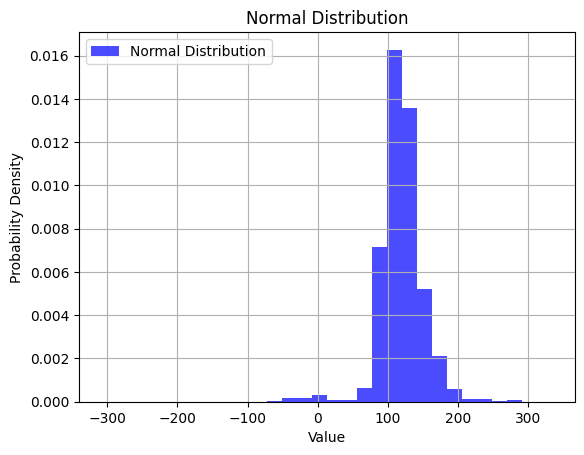

In [11]:
plt.hist(systolic_bp['lab_result_num_val'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Check for kurtosis and skewness
The kurtosis of 15 shows a sharper peak than a normal distribution. It is "skinny "in the center, and features "fat tails"

The skew number of -0.87 is a left-skewed distribution, demonstrated by the tail on the left side. It means that the left tail is longer than the right tail. The mass of the distribution is concentrated on the right.

In [17]:
systolic_bp_kurt = kurtosis(systolic_bp['lab_result_num_val'], fisher=False)
print(systolic_bp_kurt)

15.686774878212237


In [20]:
systolic_bp_skew = skew(systolic_bp['lab_result_num_val'])
print(systolic_bp_skew)

-0.8737914197241642


# Check for Outliers using IQR

In [86]:

from scipy.stats import zscore
import plotly.express as px

In [63]:
fig = px.box(systolic_bp, y='lab_result_num_val')

fig.show()

# Check for Outliers using Standard Deviation quantile method

# Analyze the distribution of creatinine levels in this data set

In [12]:
creatinine = df_lab[df_lab['code'] == '2160-0']
creatinine['lab_result_num_val'].describe()


count    3801.000000
mean        1.087006
std         1.093288
min         0.100000
25%         0.610000
50%         0.810000
75%         1.100000
max        18.000000
Name: lab_result_num_val, dtype: float64

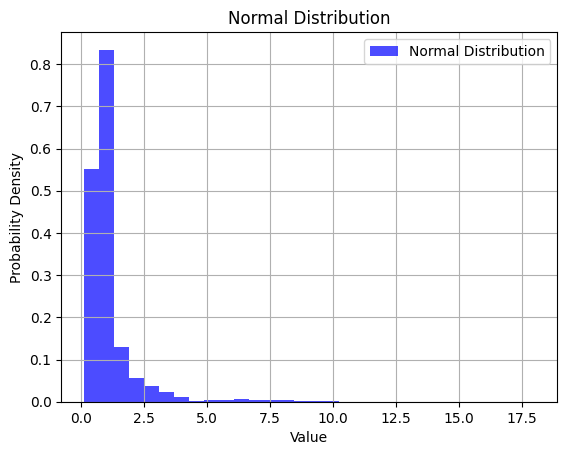

In [13]:
plt.hist(creatinine['lab_result_num_val'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Check for kurtosis and skewness  
The kurtosis of 38.7 shows a sharper peak than a normal distribution. It is "skinny "in the center, and features "fat tails"

The skew number of 4.9 is a right-skewed distribution, demonstrated by the tail on the right side. It means that the right tail is longer than the left tail. The mass of the distribution is concentrated on the left.

In [16]:
creatinine_kurt = kurtosis(creatinine['lab_result_num_val'], fisher=False)
print(creatinine_kurt)

38.73653613237473


In [22]:
creatinine_skew = skew(creatinine['lab_result_num_val'])
print(creatinine_skew)

4.934355942367434


# Check for Outliers in Creatinine
Used your code from the textbook don't know why it didn't work

In [87]:
# Calculate quartiles and IQR
q1 = np.percentile(creatinine, 25)
q3 = np.percentile(creatinine, 75)
iqr = q3 - q1

# Set threshold for outlier detection
threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 + 1.5 * iqr

# Identify outliers
outliers = [x for x in creatinine if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

TypeError: ignored

In [64]:
fig = px.box(creatinine, y='lab_result_num_val')

fig.show()

# Shapiro test for normal distribution

In [35]:
stat, p = shapiro(systolic_bp['lab_result_num_val'])
if p > 0.05:
    print("Systolic BP data follows a normal distribution.")
else:
    print("Systolic BP data does not follow a normal distribution.")
print(stat, p)

Systolic BP data does not follow a normal distribution.
0.8792375326156616 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
stat, p = shapiro(creatinine['lab_result_num_val'])
if p > 0.05:
    print("Creatinine data follows a normal distribution.")
else:
    print("Creatinine data does not follow a normal distribution.")
print(stat, p)

Creatinine data does not follow a normal distribution.
0.5349443554878235 0.0


# Pandas Profiling
Needed to choose a different file as the original one for lab values was too big and yielded error messages

In [38]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ae298cfaf693a06dd998532736a0e17e7ea93b631cc3f734be17b4a184fb7828
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [41]:
from pandas_profiling import ProfileReport

In [46]:
data = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK3/data/trinetx/medication_drug.csv')

In [47]:
report = ProfileReport(data)
report.to_file('eda_report_html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pandas_profiling/profile_report.py:314: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]